# How did Proposition 47 Affect Crime in San Francisco

In this project, we will look at the affects of Prop 47 in San Francisco. California Prop 47 lowered specific non-violent property and drug crimes from felonies to misdemeanors. Misdemeanors carry lighter sentences than felonies and, usually, fewer collateral consequences. A felony record can be very detrimental to someone’s future and Prop 47 attempted to minimize the damage in scenarios where it didn't feel warranted. The offenses included in Prop 47 are:
* **Shoplifting**: Less than \$950 worth of merchandise  
* **Petty theft**: Property worth less than \\$950  
* **Receiving stolen property**: Less than \\$950’s worth  
* **Forgery**: Value of forged instrument must be less than \\$950  
* **Fraud**: Less than \\$950’s worth  
* **Writing a bad check/insufficient funds**: Less than \\$950’s worth  
* **Simple drug possession**: Personal use of controlled substances 

Prop 47 was passed on November 4, 2014 and it came with a lot of controversy. On one hand, many people supported it and believed it would reduce overcrowding in state prisons, save state resources, and reduce recitivism. Alternatively, many others believed it would increase crime and make California less safe. The goal of this project is to use data to determine the impact the proposition had on crime by looking at the crime in San Francisco as our sample.  

The data we will be using for the project are incident reports from the San Francisco Police Department that were pulled from: https://data.sfgov.org/. One of our datasets covers incidents from 2003 to 2018 while the other cover incidents from 2018 to present (October 31, 2022). You can download the datasets from the following links:
* Incident Report from 2003 to 2018: [download](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry)  
* 2018 to Present: [download](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783)

<font size="2">*More information about prop 47 can be found*:</font> [here](https://www.courts.ca.gov/prop47.htm)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%html
<style>
table {float:left}
</style>

In [3]:
# read in data
crime_2003_2018 = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
crime_2018_2022 = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')

## Data Exploration
Let's start with an initial look at our datasets.

In [4]:
pd.options.display.max_columns = 150
crime_2003_2018.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,GENEVA AV / SANTOS ST,-122.420084,37.708311,POINT (-122.420084075249 37.7083109744362),NaN,NaN,9.0,NaN,NaN,NaN,8.0,309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,TURK ST / STJOSEPHS AV,-120.500000,90.000000,POINT (-120.50000000000001 90),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.500000,90.000000,POINT (-120.50000000000001 90),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,0 Block of SANJUAN AV,-122.436220,37.724377,POINT (-122.43622001281001 37.7243766140428),94.0,9.0,1.0,28.0,9.0,7.0,6.0,28861.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,400 Block of 10TH ST,-122.410541,37.770913,POINT (-122.410541166987 37.7709130566165),32.0,1.0,10.0,34.0,8.0,2.0,9.0,28853.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [5]:
crime_2003_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129525 entries, 0 to 2129524
Data columns (total 35 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   PdId                                                      int64  
 1   IncidntNum                                                int64  
 2   Incident Code                                             int64  
 3   Category                                                  object 
 4   Descript                                                  object 
 5   DayOfWeek                                                 object 
 6   Date                                                      object 
 7   Time                                                      object 
 8   PdDistrict                                                object 
 9   Resolution                                                object 
 10  Address                       

In [6]:
crime_2018_2022.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2021/07/25 12:00:00 AM,2021/07/25,00:00,2021,Sunday,2021/07/25 01:41:00 PM,105718906372,1057189,216105573,NaN,II,Coplogic Initial,True,6372,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,NaN,NaN,Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022/06/28 11:58:00 PM,2022/06/28,23:58,2022,Tuesday,2022/06/28 11:58:00 PM,116554371012,1165543,220264913,NaN,VS,Vehicle Supplement,NaN,71012,Other Offenses,Other Offenses,"License Plate, Recovered",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022/03/11 10:30:00 AM,2022/03/11,10:30,2022,Friday,2022/03/11 08:03:00 PM,113048071000,1130480,226040232,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,NaN,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/05/15 05:47:00 PM,2021/05/15,17:47,2021,Saturday,2021/05/15 05:47:00 PM,103051807043,1030518,210183345,NaN,VS,Vehicle Supplement,NaN,7043,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Motorcycle",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022/06/28 05:22:00 PM,2022/06/28,17:22,2022,Tuesday,2022/06/28 05:22:00 PM,116535107041,1165351,220361741,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
crime_2018_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656462 entries, 0 to 656461
Data columns (total 34 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     656462 non-null  object 
 1   Incident Date                                         656462 non-null  object 
 2   Incident Time                                         656462 non-null  object 
 3   Incident Year                                         656462 non-null  int64  
 4   Incident Day of Week                                  656462 non-null  object 
 5   Report Datetime                                       656462 non-null  object 
 6   Row ID                                                656462 non-null  int64  
 7   Incident ID                                           656462 non-null  int64  
 8   Incident Number                             

#### Observations
The goal is to combine the datasets into one and it looks like they have similar columns which will make that process easier. In some cases, there are columns that match but the column names are slightly different and, in other cases, there are columns that do not exist in the other dataset. Many of the columns will not be useful for our analysis. Lastly, the date columns have a data type of <code>object</code>.

## Data Cleaning
After an initial examination of our datasets, we have an idea of the first steps for our cleaning process:
* Drop columns that will not be useful for our analysis
* Update column names so they match
* Convert date and time columns to <code>datetime</code> data type 

Let's start with dropping and renaming columns.

In [8]:
# drop columns
crime_2003_2018 = crime_2003_2018[['IncidntNum',
                                   'Incident Code',
                                   'Category', 
                                   'Descript',
                                   'DayOfWeek', 
                                   'Date', 
                                   'Time', 
                                   'PdDistrict', 
                                   'X',
                                   'Y'
                                 ]]
# rename columns
crime_2003_2018.columns = ['incident_number',
                           'incident_code',
                           'category',
                           'description',
                           'day_of_week',
                           'date',
                           'time',
                           'police_district',
                           'latitude',
                           'longitude'
                          ]

In [9]:
# drop columns
crime_2018_2022 = crime_2018_2022[['Incident Date', 
                                   'Incident Time', 
                                   'Incident Year',
                                   'Incident Day of Week',
                                   'Incident Number',
                                   'Incident Code',
                                   'Incident Category',
                                   'Incident Description',
                                   'Police District',
                                   'Latitude',
                                   'Longitude'
                                ]]
# rename columns
crime_2018_2022.columns = ['date',
                           'time',
                           'year',
                           'day_of_week',
                           'incident_number',
                           'incident_code',
                           'category',
                           'description',
                           'police_district',
                           'latitude',
                           'longitude'
                         ]

Next, we'll update the data types for our <code>date</code> and <code>time</code> columns from strings to datetime objects.

In [10]:
# convert date colmns 
crime_2003_2018['date'] = pd.to_datetime(crime_2003_2018['date'])
crime_2018_2022['date'] = pd.to_datetime(crime_2018_2022['date'])
# convert time columns
crime_2003_2018['time'] = pd.to_datetime(crime_2003_2018['time'], format='%H:%M').dt.time
crime_2018_2022['time'] = pd.to_datetime(crime_2018_2022['time'], format='%H:%M').dt.time

In [11]:
display(crime_2003_2018.head(3))
crime_2018_2022.head(3)

,incident_number,incident_code,category,description,day_of_week,date,time,police_district,latitude,longitude
0,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,2004-11-22,17:50:00,INGLESIDE,-122.420084,37.708311
1,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,2005-10-18,20:00:00,PARK,-120.500000,90.000000
2,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,2004-02-15,02:00:00,SOUTHERN,-120.500000,90.000000


,date,time,year,day_of_week,incident_number,incident_code,category,description,police_district,latitude,longitude
0,2021-07-25,00:00:00,2021,Sunday,216105573,6372,Larceny Theft,"Theft, Other Property, $50-$200",Southern,NaN,NaN
1,2022-06-28,23:58:00,2022,Tuesday,220264913,71012,Other Offenses,"License Plate, Recovered",Out of SF,NaN,NaN
2,2022-03-11,10:30:00,2022,Friday,226040232,71000,Lost Property,Lost Property,Central,NaN,NaN


## Data Cleaning Continued
We completed our first bit of data cleaning but there are few more things we'll want to confirm before we can combine the datasets:
* Add a <code>year</code> column to <code>crime_2003_2018</code> since it's missing from that dataset
* We'll also trim our data down somewhat. Currently, we have crime data from 2003 to 2022 but we'll narrow that down so we have roughly 8 years prior and 8 years following when *Prop 47* was passed so our range will be 2007-2022.
* There is some overlap in the datasets with both having 2018 data so we'll want to decide which 2018 data we want to keep
* Align the values in the <code>category</code> column for grouping purposes 

Let's start by adding the <code>year</code> column.

In [12]:
# add year column
crime_2003_2018['year'] = crime_2003_2018['date'].dt.year

Next we want to trim our data down. Both of our datasets have data from 2018 and we also have data dating as early as 2003 but we only want data starting from 2007. We'll first sort the dataframes by date so we can make a decision on how we want to trim them down.

In [13]:
# sort dataframes by date
crime_2003_2018.sort_values(by=['date'], inplace=True)
crime_2018_2022.sort_values(by=['date'], inplace=True)

In [14]:
# start date of 1st dataset
display(crime_2003_2018.head(1))
# end date of 1st dataset
crime_2003_2018.tail(1)

,incident_number,incident_code,category,description,day_of_week,date,time,police_district,latitude,longitude,year
518462,30154235,71010,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Wednesday,2003-01-01,14:00:00,PARK,-122.450149,37.766728,2003


,incident_number,incident_code,category,description,day_of_week,date,time,police_district,latitude,longitude,year
1280417,180360794,62050,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,2018-05-15,00:19:00,PARK,-122.447761,37.769846,2018


In [15]:
# start date of 2nd dataset
display(crime_2018_2022.head(1))
# end date of 2nd dataset
crime_2018_2022.tail(1)

,date,time,year,day_of_week,incident_number,incident_code,category,description,police_district,latitude,longitude
279408,2018-01-01,11:00:00,2018,Monday,186006291,6244,Larceny Theft,"Theft, From Locked Vehicle, >$950",Mission,37.765774,-122.426491


,date,time,year,day_of_week,incident_number,incident_code,category,description,police_district,latitude,longitude
656461,2022-10-30,06:13:00,2022,Sunday,220746488,64085,Other Miscellaneous,Investigative Detention,Tenderloin,37.783933,-122.412595


The date range of our first dataset (<code>crime_2003_2018</code>) is <code>2003-01-01</code> to <code>2018-05-15</code> and the date range of our second dataset (<code>crime_2018_2022</code>) is <code>2018-01-01</code> to <code>2022-10-30</code>. We'll update <code>crime_2003_2018</code> to date range <code>2007-01-01</code> to <code>2017-12-31</code>. So, when we combine them, our dataset will have data from 2007 to 2022 with no repeat data.

In [16]:
# drop rows outside of date range 2007-2017
crime_2007_2017 = crime_2003_2018[(crime_2003_2018['year'] > 2006) & (crime_2003_2018['year'] < 2018)]

### Aligning Categories
Both of our datasets have a <code>category</code> column which indicates what type of incident the row is a record of. We will be using this column for grouping during our analysis so we want to make sure the values are aligned in both of the datasets before we combine them.

First, we'll compare the unique <code>category</code> values in both datasets

In [17]:
# check unique values
print(np.sort(crime_2007_2017['category'].unique()))
print('---------------------------------------------------------------------------------------------------------------')
print(np.sort(crime_2018_2022['category'].dropna().unique()))

['ARSON' 'ASSAULT' 'BAD CHECKS' 'BRIBERY' 'BURGLARY' 'DISORDERLY CONDUCT'
 'DRIVING UNDER THE INFLUENCE' 'DRUG/NARCOTIC' 'DRUNKENNESS'
 'EMBEZZLEMENT' 'EXTORTION' 'FORGERY/COUNTERFEITING' 'FRAUD' 'GAMBLING'
 'KIDNAPPING' 'LARCENY/THEFT' 'LIQUOR LAWS' 'LOITERING' 'MISSING PERSON'
 'NON-CRIMINAL' 'OTHER OFFENSES' 'PORNOGRAPHY/OBSCENE MAT' 'PROSTITUTION'
 'RECOVERED VEHICLE' 'ROBBERY' 'SECONDARY CODES' 'SEX OFFENSES, FORCIBLE'
 'SEX OFFENSES, NON FORCIBLE' 'STOLEN PROPERTY' 'SUICIDE' 'SUSPICIOUS OCC'
 'TREA' 'TRESPASS' 'VANDALISM' 'VEHICLE THEFT' 'WARRANTS' 'WEAPON LAWS']
---------------------------------------------------------------------------------------------------------------
['Arson' 'Assault' 'Burglary' 'Case Closure' 'Civil Sidewalks'
 'Courtesy Report' 'Disorderly Conduct' 'Drug Offense' 'Drug Violation'
 'Embezzlement' 'Fire Report' 'Forgery And Counterfeiting' 'Fraud'
 'Gambling' 'Homicide' 'Human Trafficking (A), Commercial Sex Acts'
 'Human Trafficking (B), Involuntary Servi

Comparing the unique values in the <code>category</code> column in both datasets, we can make a few obervations: 
* Some categories are exactly the same in both datasets except for the capitalization
* Some categories are the same but the names vary slightly, for example <code>VEHICLE THEFT</code> and <code>Motor Vehicle Theft</code>
* Both datasets have categories that do not exist in the other dataset

Dealing with the first two bullets will be relatively simple but handling the categories that do not exist in the opposing dataset will take a bit more digging. We can get a better understanding of the different categories by looking at the <code>description</code> column which describes the incident.

In [18]:
# checking unique descriptions of the Other Miscellaneous category
crime_2018_2022[crime_2018_2022['category'] == 'Other Miscellaneous']['description'].unique()[:50]

array(['Investigative Detention',
       'Driving While Under The Influence Of Alcohol',
       'False Report of Emergency',
       'Driving, License Suspended or Revoked', 'Probation Violation',
       'Driving, No License Issued', 'Trespassing',
       'Vehicle, Throwing Substance At',
       'Resisting, Delaying, or Obstructing  Peace Officer Duties',
       'Evading a Police Vehicle or Bicycle',
       'Driving While Under The Influence Of Drugs',
       'Identification To Peace Officer, False', 'Conspiracy',
       'Defrauding Providers of Food, Fuel, Services, or Accommodations',
       'Evading a Police Officer Recklessly',
       'Threatening School or Public Employee', 'Driving, Reckless',
       'Public Nuisance, Maintaining After Notification',
       'Lodging Without Permission', 'Parole Violation, Adult',
       'Bomb Threat or False Report of Bomb',
       'Burglary Tools, Possession Of',
       'Resisting Peace Officer, causing Their Serious Injury or Death',
       'Inj

Above we see some of the values in the <code>Other Miscellaneous</code> category from the <code>crime_2018_2022</code> dataset. There are several categories from our other dataset (<code>crime_2007_2017</code>) that would fall under this category:
* <code>DRIVING UNDER THE INFLUENCE</code>
* <code>KIDNAPPING</code>
* <code>TRESPASS</code>
* <code>TREA</code>
* <code>EXTORTION</code>

In [19]:
# comparing incidents in <Offences Against The Family And Children> category to <SECONDARY CODES> category
print(crime_2018_2022[crime_2018_2022['category'] == 'Offences Against The Family And Children']['description'].unique())
print('---------------------------------------------------------------------------------------------------------------')
print(crime_2007_2017[crime_2007_2017['category'] == 'SECONDARY CODES']['description'].unique())

['EPO or Restraining Order Violation, DVU related'
 'Domestic Violence (secondary only)' 'Hate Crime (secondary only)'
 'Restraining Order Notification/Service of Restraining Order'
 'Violation of Stay Away Order' 'Violation of Restraining Order'
 'Stay Away Order Violation, DVU related'
 'ATM-related Crime (secondary code only)' 'Stalking' 'Tarasoff Report'
 'Violation of Emergency Protective Order' 'Loitering near ATM'
 'Terrorizing by Marking Private Property'
 'Probation Violation, DVU related' 'Violation of Civil Gang Injunction'
 'Phone Calls in Violation of DVU Court Order'
 'Terrorizing by Arson or Explosive Device'
 'Terrorizing by Interfering with Religious Worship'
 "Megan's Law Notification" 'Firearms, Seizing at Scene of DVU']
---------------------------------------------------------------------------------------------------------------
['DOMESTIC VIOLENCE' 'PREJUDICE-BASED INCIDENT' 'ATM RELATED CRIME'
 'GANG ACTIVITY']


Above we are comparing the <code>Offences Against The Family And Children</code> category from <code>crime_2018_2022</code> to <code>SECONDARY CODES</code> from <code>crime_2007_2017</code> and the descriptions match for both of these categories so it makes sense to group the together.

In [20]:
# comparing incidents in <Rape> category to <SEX OFFENSES, FORCIBLE> category
print(crime_2018_2022[crime_2018_2022['category'] == 'Rape']['description'].unique())
print('---------------------------------------------------------------------------------------------------------------')
print(crime_2007_2017[crime_2007_2017['category'] == 'SEX OFFENSES, FORCIBLE']['description'].unique())

['Rape, Forcible, W/ Force' 'Rape, Assault To, W/ Other Weapon'
 'Penetration, Forced, with Object' 'Rape, Att., W/ Gun'
 'Sodomy (Adult Victim)' 'Rape, Assault To, W/ Force'
 'Oral Copulation, Unlawful (Adult Victim)' 'Rape, Att., W/ Force'
 'Rape, Att., W/ Sharp Object' 'Rape, Assault To, W/ Sharp Object'
 'Rape, Spousal' 'Rape, Forcible, W/ Gun' 'Rape, Assault To, W/ Gun'
 'Rape, Forcible, W/ Sharp Object' 'Rape, Att., W/ Other Weapon'
 'Rape, Forcible, W/ Other Weapon']
---------------------------------------------------------------------------------------------------------------
['SEXUAL BATTERY' 'FORCIBLE RAPE, ARMED WITH A SHARP INSTRUMENT'
 'ASSAULT TO RAPE WITH BODILY FORCE'
 'FORCIBLE RAPE, ARMED WITH A DANGEROUS WEAPON' 'ENGAGING IN LEWD ACT'
 'FORCIBLE RAPE, BODILY FORCE' 'ATTEMPTED RAPE, BODILY FORCE'
 'SEXUAL ASSAULT, ADMINISTERING DRUG TO COMMIT'
 'ASSAULT TO RAPE WITH A DANGEROUS WEAPON'
 'ASSAULT TO RAPE WITH A SHARP INSTRUMENT'
 'ATTEMPTED RAPE, ARMED WITH A SHARP INS

Again we are comparing two categories from the different datasets: <code>Rape</code> and <code>SEX OFFENSES, FORCIBLE</code>. These categories have the same types of incidents so we can merge them under one category name.

### Merging Strategy
We saw 3 examples of a comparison of categories from the different datasets and how they could be aligned. I don't want to demonstrate this for every category but I went through a similar process with all of the categories that didn't have a match in the opposite dataset, digging into them to see the best way to combine them and here is the approach we'll take:
#### Categories with a match
The below table shows all of the categories that have an exact or close to extact match in the opposite data set. We will update all of the values in <code>crime_2018_2022</code> (left) to the value from <code>crime_2007_2018</code> (right).  

| <code>crime_2018_2022</code> | <code>crime_2007_2017</code> |
| ---------------------------- | --------------------------- |
| Arson | ARSON |
| Assault | ASSAULT |
 Burglary | BURGLARY 
Disorderly Conduct | DISORDERLY CONDUCT
Drug Offense | DRUG/NARCOTIC
Drug Violation | DRUG/NARCOTIC
Embezzlement | EMBEZZLEMENT
Forgery And Counterfeiting | FORGERY/COUNTERFEITING 
Fraud | FRAUD
Gambling | GAMBLING
Larceny Theft| LARCENY/THEFT
Liquor Laws | LIQUOR LAWS
Missing Person | MISSING PERSON
Motor Vehicle Theft | VEHICLE THEFT
Motor Vehicle Theft? | VEHICLE THEFT
Other Offenses| OTHER OFFENSES
Prostitution | PROSTITUTION
Robbery| ROBBERY
Stolen Property | STOLEN PROPERTY
Suspicious Occ | SUSPICIOUS OCC
Warrant | WARRANTS |

#### Non-Criminal Categories
Each row in our datasets represent an *incident* reported by the Police Department. We are particularly interested in crime related incidents but not everything reported is crime related. We will update the values for these categories to 'NON-CRIMINAL' so we can easily remove them from our dataset. The below table shows a list of these categories from each dataset.

| <code>crime_2018_2022</code> | <code>crime_2007_2017</code> |
| ---------------------------- | --------------------------- |
 Fire Report | DRUNKENESS
 Case Closure | RECOVERED VEHICLE
| Civil Sidewalks | NON-CRIMINAL
| Courtesy Report | SUICIDE
| Lost Property |
| Other |
 Recovered Vehicle |
 Non-Criminal
 Suicide
 Vehicle Impounded
 Vehicle Misplaced
 Traffic Collision


#### Consolidating the Remaining Categories 
There are a few different approaches we will take to handle the remaining categories. The below will take care of the categories that do not have matches in the opposite dataset (like the few examples we dug into by looking at the descriptions above)  

Adding more specific categories from one dataset to a broader category from the other dataset:
* Categories from <code>crime_2007_2017</code> that will be converted to a broader category from <code>crime_2018_2022</code>
  - <code>DRIVING UNDER THE INFLUENCE</code>, <code>KIDNAPPING</code>,<code>TRESPASS</code>, <code>TREA</code>, <code>EXTORTION</code> converted to <code>Other Miscellaneous</code>
  - <code>SEX OFFENSES, NON FORCIBLE</code>, <code>PORNOGRAPHY/OBSCENE MAT</code> converted to <code>Sex Offense</code>
  - <code>VANDALISM</code> converted to <code>Malicious Mischief</code>
  - <code>LOITERING</code> converted to <code>Disorderly Conduct</code> (found in both datasets)
  - <code>BAD CHECKS</code> converted to <code>Fraud</code> (found in both datasets)
* Categories from <code>crime_2018_2022</code> that will be converted to a broader category from <code>crime_2007_2017</code> 
  - <code>Vandalism</code> converted to <code>Malicious Mischief</code>
  -  <code>Rape</code> converted to <code>SEX OFFENSES, FORCIBLE</code>
  - <code>Traffic Violation Arrest</code> converted to <code>Other Offenses</code> (found in both datasets)
  - <code>Weapons Carrying Etc</code>, <code>Weapons Offence</code>, <code>Weapons Offense</code> converted to <code>WEAPON LAWS</code>

There were a few categories that we could not find a category in the opposite dataset to merge with. For these, we will leave the categories as is:
* From <code>crime_2018_2022</code>: <code>Homicide</code>, <code>Miscellaneous Investigation</code>, <code>Suspicious</code>
* From <code>crime_2007_2017</code>: <code>BRIBERY</code>

Lastly, there 3 categories from <code>crime_2018_2022</code> that we'll consolidate into one:
* <code>Human Trafficking (A), Commercial Sex Acts</code>, <code>Human Trafficking (B), Involuntary Servitude</code>, <code>Human Trafficking, Commercial Sex Acts</code> will be converted to <code>Human Trafficking</code>

## Updating Categories
Now that we've defined our merging strategy, we will apply it to our datasets.

In [21]:
# dictionary for category mapping
replace_vals1 = {
                    'EXTORTION':'OTHER MISCELLANEOUS',
                    'DRIVING UNDER THE INFLUENCE': 'OTHER MISCELLANEOUS',
                    'TREA': 'OTHER MISCELLANEOUS', 
                    'TRESPASS': 'OTHER MISCELLANEOUS',
                    'SUICIDE':'NON-CRIMINAL',
                    'VANDALISM':'MALICIOUS MISCHIEF',
                    'LOITERING': 'DISORDERLY CONDUCT',
                    'BAD CHECKS':'FRAUD',
                    'DRUNKENNESS': 'NON-CRIMINAL',
                    'KIDNAPPING':'OTHER MISCELLANEOUS',
                    'RECOVERED VEHICLE':'NON-CRIMINAL',
                    'PORNOGRAPHY/OBSCENE MAT': 'SEX OFFENSE',
                    'SEX OFFENSES, NON FORCIBLE': 'SEX OFFENSE'
                }
# update category values in crime_2007_2017 by mapping dictionary 
crime_2007_2017['category'] = crime_2007_2017['category'].map(replace_vals1).fillna(crime_2007_2017['category'])

In [22]:
# dictionary for category mapping
replace_vals2 = {
                    'Arson':'ARSON', 
                    'Assault':'ASSAULT', 
                    'Burglary':'BURGLARY', 
                    'Case Closure':'NON-CRIMINAL', 
                    'Civil Sidewalks':'NON-CRIMINAL',
                    'Courtesy Report':'NON-CRIMINAL', 
                    'Disorderly Conduct':'DISORDERLY CONDUCT', 
                    'Drug Offense':'DRUG/NARCOTIC',
                    'Drug Violation':'DRUG/NARCOTIC', 
                    'Embezzlement':'EMBEZZLEMENT', 
                    'Fire Report':'NON-CRIMINAL',
                    'Forgery And Counterfeiting':'FORGERY/COUNTERFEITING', 
                    'Fraud':'FRAUD', 
                    'Gambling':'GAMBLING', 
                    'Homicide':'HOMICIDE',
                    'Human Trafficking (A), Commercial Sex Acts':'HUMAN TRAFFICKING',
                    'Human Trafficking (B), Involuntary Servitude':'HUMAN TRAFFICKING',
                    'Human Trafficking, Commercial Sex Acts':'HUMAN TRAFFICKING', 
                    'Larceny Theft':'LARCENY/THEFT',
                    'Liquor Laws':'LIQUOR LAWS', 
                    'Lost Property':'NON-CRIMINAL', 
                    'Malicious Mischief':'MALICIOUS MISCHIEF',
                    'Miscellaneous Investigation': 'MISCELLANEOUS INVESTIGATION', 
                    'Missing Person':'MISSING PERSON',
                    'Motor Vehicle Theft':'VEHICLE THEFT', 
                    'Motor Vehicle Theft?':'VEHICLE THEFT', 
                    'Non-Criminal':'NON-CRIMINAL',
                    'Offences Against The Family And Children':'SECONDARY CODES', 
                    'Other':'NON-CRIMINAL',
                    'Other Miscellaneous': 'OTHER MISCELLANEOUS', 
                    'Other Offenses':'OTHER OFFENSES', 
                    'Prostitution':'PROSTITUTION', 
                    'Rape':'SEX OFFENSES, FORCIBLE',
                    'Recovered Vehicle':'NON-CRIMINAL', 
                    'Robbery':'ROBBERY', 
                    'Sex Offense':'SEX OFFENSE', 
                    'Stolen Property':'STOLEN PROPERTY',
                    'Suicide':'NON-CRIMINAL', 
                    'Suspicious':'SUSPICIOUS', 
                    'Suspicious Occ':'SUSPICIOUS OCC', 
                    'Traffic Collision':'NON-CRIMINAL',
                    'Traffic Violation Arrest':'OTHER OFFENSES', 
                    'Vandalism':'MALICIOUS MISCHIEF', 
                    'Vehicle Impounded':'NON-CRIMINAL',
                    'Vehicle Misplaced':'NON-CRIMINAL', 
                    'Warrant':'WARRANTS', 
                    'Weapons Carrying Etc':'WEAPON LAWS',
                    'Weapons Offence':'WEAPON LAWS', 
                    'Weapons Offense':'WEAPON LAWS'
                }

# update category values in crime_2018_2022 by mapping dictionary 
crime_2018_2022['category'] = crime_2018_2022['category'].map(replace_vals2).fillna(crime_2018_2022['category'])

Below we review the unique values in our <code>category</code> columns after applying our merging strategy and we can see that they are much more aligned.

In [23]:
# check unique values
print(np.sort(crime_2007_2017['category'].unique()))
print('---------------------------------------------------------------------------------------------------------------')
print(np.sort(crime_2018_2022['category'].dropna().unique()))

['ARSON' 'ASSAULT' 'BRIBERY' 'BURGLARY' 'DISORDERLY CONDUCT'
 'DRUG/NARCOTIC' 'EMBEZZLEMENT' 'FORGERY/COUNTERFEITING' 'FRAUD'
 'GAMBLING' 'LARCENY/THEFT' 'LIQUOR LAWS' 'MALICIOUS MISCHIEF'
 'MISSING PERSON' 'NON-CRIMINAL' 'OTHER MISCELLANEOUS' 'OTHER OFFENSES'
 'PROSTITUTION' 'ROBBERY' 'SECONDARY CODES' 'SEX OFFENSE'
 'SEX OFFENSES, FORCIBLE' 'STOLEN PROPERTY' 'SUSPICIOUS OCC'
 'VEHICLE THEFT' 'WARRANTS' 'WEAPON LAWS']
---------------------------------------------------------------------------------------------------------------
['ARSON' 'ASSAULT' 'BURGLARY' 'DISORDERLY CONDUCT' 'DRUG/NARCOTIC'
 'EMBEZZLEMENT' 'FORGERY/COUNTERFEITING' 'FRAUD' 'GAMBLING' 'HOMICIDE'
 'HUMAN TRAFFICKING' 'LARCENY/THEFT' 'LIQUOR LAWS' 'MALICIOUS MISCHIEF'
 'MISCELLANEOUS INVESTIGATION' 'MISSING PERSON' 'NON-CRIMINAL'
 'OTHER MISCELLANEOUS' 'OTHER OFFENSES' 'PROSTITUTION' 'ROBBERY'
 'SECONDARY CODES' 'SEX OFFENSE' 'SEX OFFENSES, FORCIBLE'
 'STOLEN PROPERTY' 'SUSPICIOUS' 'SUSPICIOUS OCC' 'VEHICLE THEFT'
 'WA

## Combining Data
We're finally ready to combine our dataframes! After we combine them, we'll drop the rows that we labeled <code>NON-CRIMINAL</code>. 

In [24]:
# combine dataframes
crime_combined = pd.concat([crime_2007_2017, crime_2018_2022])

In [25]:
# drop NON-CRIMINAL rows
crime_combined = crime_combined[crime_combined['category'] != 'NON-CRIMINAL']
# reset index
crime_combined.reset_index(drop=True, inplace=True)

## Exploring Combined Data
Our new combined dataset has 1.9 million crime related police incidents from <code>2007</code> to <code>2022</code>. 

In [26]:
# check out updated dataset
print(crime_combined.shape)
display(crime_combined.head(3))
display(crime_combined.tail(3))

(1895712, 11)


,incident_number,incident_code,category,description,day_of_week,date,time,police_district,latitude,longitude,year
0,76001892,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,2007-01-01,21:00:00,INGLESIDE,-122.422013,37.746449,2007
1,70000450,65016,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,2007-01-01,01:35:00,TARAVAL,-122.459004,37.711387,2007
2,70003971,6242,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,2007-01-01,17:00:00,INGLESIDE,-122.438475,37.738558,2007


,incident_number,incident_code,category,description,day_of_week,date,time,police_district,latitude,longitude,year
1895709,220747925,3074,ROBBERY,"Robbery, W/ Force",Sunday,2022-10-30,17:00:00,Southern,37.773474,-122.418030,2022
1895710,220746933,6244,LARCENY/THEFT,"Theft, From Locked Vehicle, >$950",Sunday,2022-10-30,09:00:00,Northern,37.785668,-122.436557,2022
1895711,220746488,64085,OTHER MISCELLANEOUS,Investigative Detention,Sunday,2022-10-30,06:13:00,Tenderloin,37.783933,-122.412595,2022


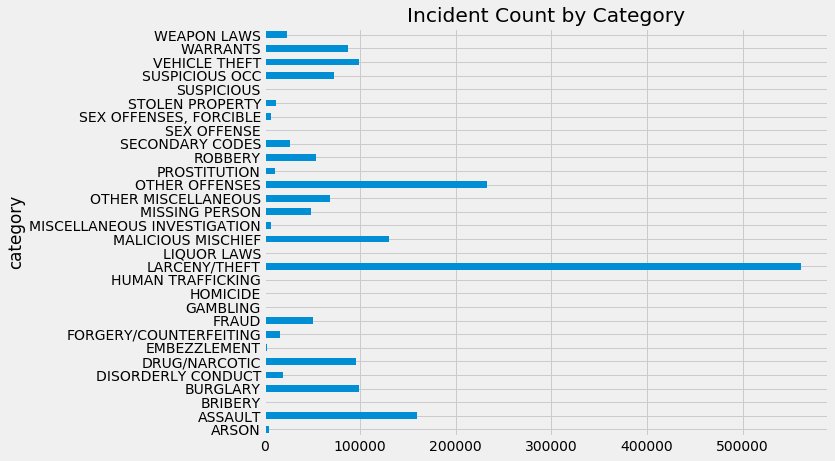

In [27]:
# implement style for graphs
plt.style.use('fivethirtyeight')
# incident count by category
category_count = crime_combined.groupby('category').count()
# plot
category_count['incident_number'].plot.barh(figsize=(9,7))
plt.title('Incident Count by Category')
plt.show()

The above bar chart show the total count of incidents by category for our dataset. Cleary <code>LARCENY/THEFT</code> has been the most common type with over 500k. Following that we have <code>OTHER OFFENSES</code>, then <code>ASSAULT</code>

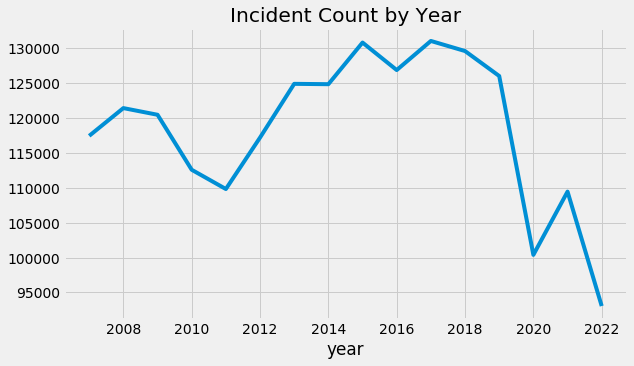

In [28]:
# incident count by year
year_count = crime_combined.groupby('year').count()
# plot
year_count['incident_number'].plot.line(figsize=(9,5))
plt.title('Incident Count by Year')
plt.show()

Above we see how the total number of incidents per year changed over time. There was a slight dip 2010-2011, then we see it rise and stay above 120k until a drop off in 2020. I would speculate that the drop off in 2020 could be related to the COVID-19 lockdowns which carried through 2021. Although we don't really see it come back to it's previous levels in 2022 either. One more thing to keep in mind is we only have data in 2022 up to the current date (10/31) so we are missing Nov and Dec data.

## Reducing Date Range
For our analysis, we want to look at a more narrow date range. We're going to reduce the range to 2 years before and 2 years after Prop 47 was passed. The idea here is to find a balance between a fair amount of data while staying close enough to the date Prop 47 was passed because we think this will demonstrate the impact attributed to the passing of this proposition and remove some variability. Of course, there are many factors at play no matter what date range we choose, but a 10 year span presents a lot more variability than a 4 year span. 

Below we reduce the date range to only keep dates within <code>2012</code> and <code>2016</code>.

In [29]:
# date range filter
date_range = (crime_combined['year'] > 2011) & (crime_combined['year'] < 2017)
# update dataset to date range 2012 and 2016
crime = crime_combined[date_range]

## Isolating Crime Incidents Related to Prop 47
Prop 47 reduced penalties for specific types of crime:
* Shoplifting
* Petty theft
* Receiving stolen property 
* Forgery
* Fraud
* Writing a bad check/insufficient funds
* Simple drug possession

After review, shoplifting actually appears in two categories <code>LARCENY/THEFT</code> and <code>ROBBERY</code>. We will create a separate category for <code>SHOPLIFTING</code> and add all of the related incidents to that category.

In [30]:
# filter for 'shoplifting' in the description
shoplifting = crime['description'].str.contains('shoplifting', case=False)
# identifying categories using filter 
crime.loc[shoplifting, 'category'].value_counts()

LARCENY/THEFT    9636
ROBBERY           171
Name: category, dtype: int64

In [31]:
# update the category of shoplifting related incidents
crime.loc[shoplifting, 'category'] = 'SHOPLIFTING'
# check updated rows
crime[crime['category'] == 'SHOPLIFTING'].head(3)

,incident_number,incident_code,category,description,day_of_week,date,time,police_district,latitude,longitude,year
581881,120001099,6361,SHOPLIFTING,PETTY THEFT SHOPLIFTING,Sunday,2012-01-01,07:00:00,SOUTHERN,-122.416819,37.776936,2012
581929,120001657,6362,SHOPLIFTING,PETTY THEFT SHOPLIFTING,Sunday,2012-01-01,12:00:00,TENDERLOIN,-122.406428,37.787109,2012
581969,120001889,6361,SHOPLIFTING,PETTY THEFT SHOPLIFTING,Sunday,2012-01-01,14:47:00,TARAVAL,-122.477977,37.726935,2012


From here we will narrow down our dataset to the affected categories of crime to see how the trends compared before and after Prop 47 was passed. These are the categories in our dataset that relate to the above:
* <code>SHOPLIFTING</code>: Shoplifting
* <code>LARCENY/THEFT</code>: Petty theft
* <code>STOLEN PROPERTY</code>: Receiving Stolen Property
* <code>FORGERY/COUNTERFEITING</code>: Forgery
* <code>FRAUD</code>: Fraud & Writing a bad check/insufficient funds
* <code>DRUG/NARCOTIC</code>: Simple drug possession

In [32]:
# list of categories affected by Prop 47
categories = [
                'SHOPLIFTING',
                'LARCENY/THEFT',
                'STOLEN PROPERTY',
                'FORGERY/COUNTERFEITING',
                'FRAUD',
                'DRUG/NARCOTIC'
            ]
# create updated dataset with above categories
crime_updated = crime[crime['category'].isin(categories)]
# reset index
crime_updated.reset_index(drop=True, inplace=True)

In [33]:
# frequency table
crime_updated['category'].value_counts()

LARCENY/THEFT             177545
DRUG/NARCOTIC              26699
FRAUD                      14342
SHOPLIFTING                 9807
STOLEN PROPERTY             4895
FORGERY/COUNTERFEITING      4035
Name: category, dtype: int64

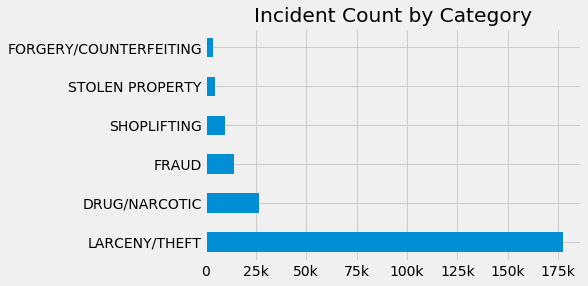

In [41]:
ax = crime_updated['category'].value_counts().plot.barh()
ax.set_xticklabels(['0','25k','50k','75k','100k','125k','150k','175k'])
plt.title('Incident Count by Category')
plt.show()

We've limited the date range of our dataset and reduced the crime categories to only incldue those that were affected by Prop 47. The bar chart above shows us the total counts of the different categories for our reduced date range. <code>LARCENY/THEFT</code> is still by far the most common with over 175k. The rest have a count of 25k or below. Next, we'll try to get a better visual of how the crime count changed from 2012 to 2016 by plotting the rolling mean of daily crime count with a moving of 150 days. 

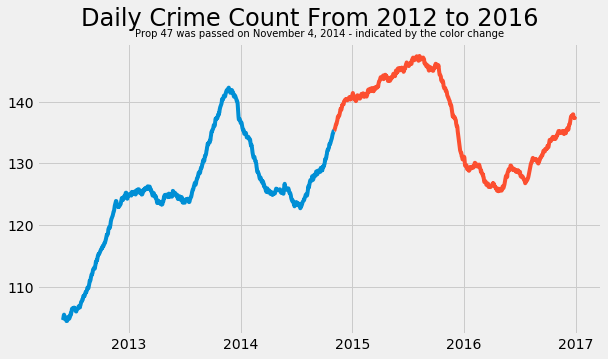

In [35]:
# group data by date to get crime count per day
group_date = crime_updated.groupby('date', sort=False).count()['incident_number']
# calculate rolling mean with rolling window of 150 days
rolling_mean = group_date.rolling(150).mean()

# separate data before and after prop 47
before_plot = rolling_mean[:1038]
after_plot = rolling_mean[1037:]

# plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(before_plot)
ax.plot(after_plot)
# add title
plt.suptitle('Daily Crime Count From 2012 to 2016', fontsize=24)
plt.title('Prop 47 was passed on November 4, 2014 - indicated by the color change',fontsize=10)
plt.show()

The line plot shows the contrast of daily crime count before and after prop 47 was passed. Following the passing of the proposition, we see an increase past it's previous peak until a drop towards the end of 2015. 

## Hypothesis Testing
We'll now use hypothesis testing to calculate the probability that random chance is responsible for the differences between crime in San Francisco before and after Prop 47 was passed in California. Let's start by stating our null and alternative hypotheses.  
* **Null**: The amount of crime in San Francisco was the same before and after Prop 47 was passed.
* **Alternative**: The amount of crime in San Francisco increased after Prop 47 was passed. 

We want to split our data into 2 groups: <code>before</code> will represent a 2 year time period before Prop 47 was passed and <code>after</code> will represent a 2 year time period after Prop 47 was passed. Prop 47 was passed on November 4, 2014 so we'll have 24 month ranges on each side: 
* <code>before</code>: November 4, 2012 to October 31, 2014
* <code>after</code>: November 4, 2014 to October 31, 2016  

Let's start by splitting our data.

In [36]:
# splitting data
before = crime_updated[(crime_updated['date'] >= '2012-11-04') & (crime_updated['date'] < '2014-11-01')]
after = crime_updated[(crime_updated['date'] >= '2014-11-04') & (crime_updated['date'] < '2016-11-01')]
# reset indexes
before.reset_index(drop=True, inplace=True)
after.reset_index(drop=True, inplace=True)
# add column for Month-Year (format:Nov-2014)
before['month_year'] = before['date'].dt.strftime('%b-%Y')
after['month_year'] = after['date'].dt.strftime('%b-%Y')

### Test Statistic
Since we want to know if the amount of crime increased significantly after Prop 47, we will use the difference in means (mean difference) of monthly crime for time periods before and after Prop 47 as our test statistic. We'll calculate the mean difference by subtracting the mean of incident count per month <code>before</code> from the mean of incident count per month <code>after</code>.

Below we'll group our data by month to get the number of crime incidents per month for <code>before</code> and <code>after</code>. Next we'll calculate the mean for each of those, and then we'll calculate mean difference. 

In [37]:
# crime count per month
before_count = before.groupby('month_year', sort=False).count()['incident_number']
after_count = after.groupby('month_year', sort=False).count()['incident_number']
# calculating the mean number of crimes per month before and after
mean_before = np.mean(before_count)
mean_after = np.mean(after_count)

# calculate mean difference
mean_difference = mean_after - mean_before

# print values
print(f'Before: {round(mean_before,2)}')
print(f'After: {round(mean_after,2)} \n')
print(f'Mean Difference: {round(mean_difference,2)}')

Before: 3929.54
After: 4140.21 

Mean Difference: 210.67


### Permutation Test
We'll use the permutation test as our statistical test to determine how likely the observed difference is due to random chance. Before we begin the test, we want to set the p value threshold which will help us determine if we're going to reject or fail to reject our null hypothesis. The p value threshold will be .05, meaning there's a 5% chance the results are due to random chance. We will come back to this.

### Sampling Distribution
To conduct the permutation test, we'll start with a simulation by repeatedly and randomly reassigning each data point (monthly incident count) to either the before or after period. For each iterration, we'll recalculate the mean difference. The result will be a sampling distribution which approximates the full range of possible test statistics under the null hypothesis. By re-randomizing the data, we're simulating what randomly generated groupings of the monthly crime counts would look like. This will help us understand how rare the groupings in our actual data are. The steps we'll take to perform this simulation are:
* Creat list (<code>all_values</code>) of all of the monthly crime count values from <code>before_count</code> and <code>after_count</code>
* Complete 5,000 iterrations of: 
  - Loop through the values of <code>all_values</code> and randomly assign each value by:
    - Generating a random number between 0 and 1
    - If the number is >=0.5, assign value to <code>before_group</code>, Else assign value to <code>after_group</code>
  - Calculate the mean for <code>before_group</code> and <code>after_group</code>
  - Calulate the mean difference and append that to the list <code>mean_differences</code>.
* Plot a visual representation of <code>mean_differences</code> distribution as a histogram

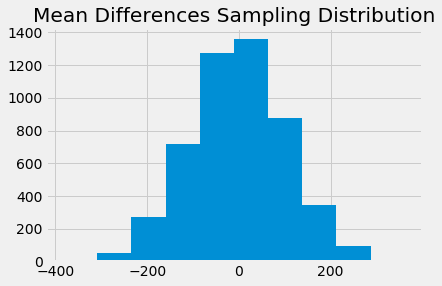

In [38]:
# create list of all monthly crime count values
all_values = list(before_count) + list(after_count)

# resample and recompute test statistic simulation
mean_differences = []
for i in range(0,5000):
    before_group = []
    after_group = []
    
    for v in all_values:
        n = np.random.rand()
        if n >= .5:
            before_group.append(v)
        elif n < .5:
            after_group.append(v)
            
    iter_mean_difference = np.mean(after_group) - np.mean(before_group)
    mean_differences.append(iter_mean_difference)

# plotting histogram of values from our permutation test    
plt.hist(mean_differences)
plt.title('Mean Differences Sampling Distribution')
plt.show()

The histogram above gives us a visual representation of the sampling distribution. Next, we want to create a dictionary for the distribution so we can measure our observed test statistic against the frequency of expected test statistics generated by our random test. We'll loop over <code>mean_differences</code> and add the values as keys then count how often the value appears. 

In [39]:
# create dictionary
sampling_distribution = {}
# if value exists in dictionary increment by 1, else add value to dictionary and set equal to 1
for v in mean_differences:
    if sampling_distribution.get(v, False):
        sampling_distribution[v] += 1
    else:
        sampling_distribution[v] = 1

### Calculating P Value
Now, we can calculate the p value which measures the probability of obtaining the observed results, assuming the null hypothesis is true. To calculate the p value, we can use the sampling distribution to determine the number of times a value of <code>210.67</code> or higher appeared in our simulation. If we divide that frequency by 5,000, we'll have the probability of observing a mean difference of <code>210.67</code> or higher by random chance.

The value p value threshold we set was .05. If our p value is less than .05, we will reject the null hypothesis. If it's greater than .05, we will fail to reject the null hypothesis. 

In [40]:
# create list of frequencies greater than or equal to test statistic
frequencies = []
for k in sampling_distribution:
    if k >= 210.67:
        frequencies.append(sampling_distribution[k])
# calculate p value        
p_value = sum(frequencies) / 5000
print(f'P Value: {p_value}')

P Value: 0.0218


### Conclusion
Since our p value <code>.0218</code> is less than the threshold we set <code>.05</code>, we conclude that the difference between the monthly crime before and after Prop 47 was passed can't be attributed to random chance alone. Therefore, we fail to reject the null hypothesis.